# Galaxy vs Quasars

We use the data contained in **SDSS** (Sloan Digital Sky Survey) cataloug. It contains multi-band photometric observations of galaxies.

In [1]:
import numpy as np
import pylab as plt
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams['font.size'] = 15

In [2]:
import pandas as pd
data = pd.read_csv("galaxyquasar.csv")
data

,u,g,r,i,z,class,z1,zerr
0,18.97213,18.53676,18.58280,18.34936,18.29215,QSO,0.522819,0.000155
1,19.24592,17.47646,16.47817,16.04472,15.68851,GALAXY,0.122846,0.000028
2,19.43536,17.70268,16.91565,16.58327,16.39128,GALAXY,0.000000,0.000000
3,19.31626,18.18312,17.39591,16.94549,16.65395,GALAXY,0.147435,0.000009
4,19.28828,19.11188,18.88937,18.80013,18.49183,QSO,2.011455,0.000631
...,...,...,...,...,...,...,...,...
49995,19.37295,18.12382,17.39886,16.98503,16.70585,GALAXY,0.113016,0.000011
49996,18.52021,16.88262,16.03280,15.56884,15.22454,GALAXY,0.085063,0.000014
49997,18.62718,17.30876,16.87371,16.62399,16.42296,GALAXY,0.054429,0.000008
49998,19.55140,18.27711,17.62101,17.21947,17.03347,GALAXY,0.112571,0.000009


In [3]:
data.columns

Index(['u', 'g', 'r', 'i', 'z', 'class', 'z1', 'zerr'], dtype='object')

## Data exploration

Now we create colors arrays and an array with class labels, 0 = galaxy, 1 = quasar.

In [4]:
ug = np.array(data['u']-data['g'])
gr = np.array(data['g']-data['r'])
ri = np.array(data['r']-data['i'])
iz = np.array(data['i']-data['z'])


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])
labels_ = le.inverse_transform(data['class'])
class_names_ = le.classes_
print(class_names_)
print(labels_)


['GALAXY' 'QSO']
['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


Text(0.5, 1.04, 'Corner plot 4-D parameter space')

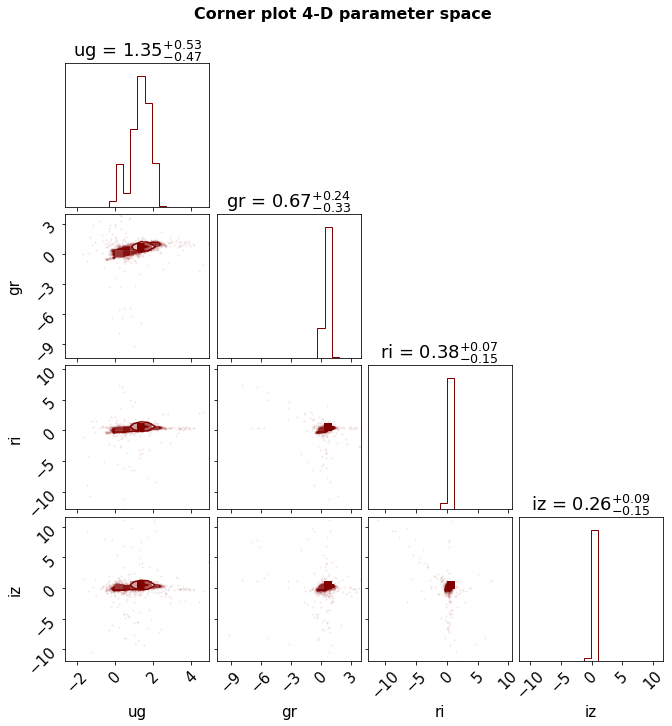

In [5]:
import corner


labels = ["ug", "gr", "ri", "iz"]
fig = corner.corner(np.array([ug, gr, ri, iz]).T, labels=labels, show_titles= True, color = 'maroon');
fig.suptitle('Corner plot 4-D parameter space', fontsize = 16, fontweight="bold",  y=1.04)

The ug color seems more interesting than others.

(0.0, 3.0)

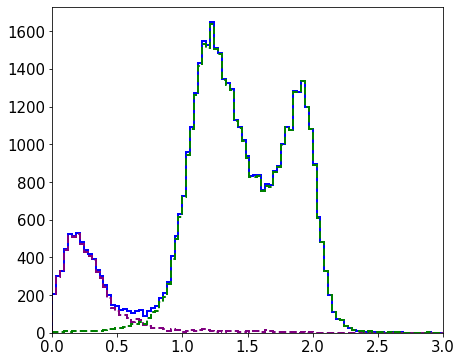

In [6]:
plt.hist(ug,histtype='step',bins=np.linspace(0,3,100), color = 'blue' , linewidth = 2);
plt.hist(ug[labels_ == 'QSO'],histtype='step',bins=np.linspace(0,3,100), color = 'purple', linewidth = 2,  linestyle='--');
plt.hist(ug[labels_ == 'GALAXY'],histtype='step',bins=np.linspace(0,3,100), color = 'green', linewidth = 2, linestyle='--');
plt.xlim(0,3)

The bimodality observed is ascribable to the quasars and galaxies distinction.

In [7]:
# to pass from QSO and GALAXY to 1 and 0

data['class'] = le.fit_transform(data['class'])
labels_ = le.inverse_transform(data['class'])
class_names_ = le.classes_
print(class_names_)
print(labels_)

[0 1]
[1 0 0 ... 0 0 0]


## Splitting of the dataset

Now we devide our dataset into training and validation set.

In [8]:
from sklearn.model_selection import train_test_split

X=np.array([ug, gr, ri, iz]).T
print(X.shape)
X_train, X_validation, y_train, y_validation = train_test_split(X, labels_, test_size=0.3, random_state=1)
print(X_train.shape)

(50000, 4)
(35000, 4)


## Classification

Our goal is to perform classification, using different classification methods and evaluate their performance with **ROC** (Receiver Operating Characteristic), which displays the true-positive vs the false-positive rate curve.

### 1. Gaussian Naive Bayes

Here we assume that all attributes are conditionally independent. The name Gaussian is due the modelling of the density probability of an object with class k having the attributes $x^j$,  $p(x^j|y=y_k)$ with a one-dimensional normal distributions.

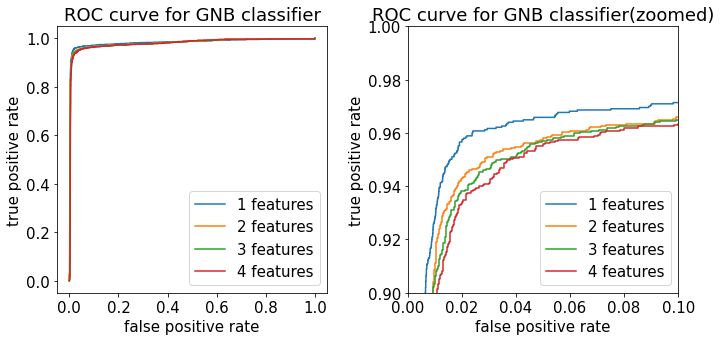

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

gnb = GaussianNB()

for i in range(4):

    gnb.fit(X_train[:,0:i+1], y_train)
    y_prob = gnb.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(i+1) + ' features')
    ax2.plot(fpr, tpr, label = str(i+1) + ' features')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for GNB classifier')
ax2.set_title('ROC curve for GNB classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

In this case the increase of features gives a worse result in the classification. 

## Scrivi qualcosa sull'assunzione !!! 

### 2. Linear Discriminant Analysis

In  **LDA** we simplify the Gaussian Bayes classifier by assuming that the class distributions have identical covariances for all 
 classes.

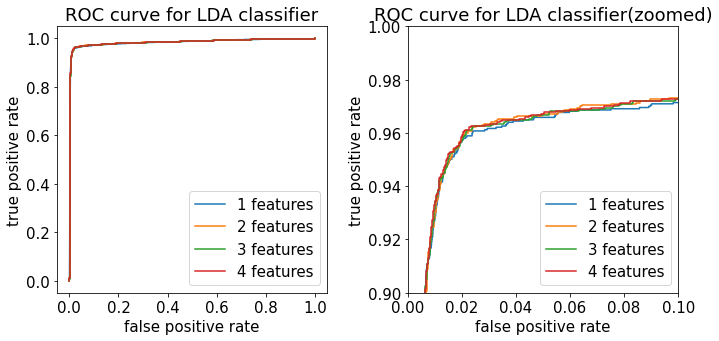

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

lda = LDA()

for i in range(4):

    lda.fit(X_train[:,0:i+1], y_train)
    y_prob = lda.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(i+1) + ' features')
    ax2.plot(fpr, tpr, label = str(i+1) + ' features')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for LDA classifier')
ax2.set_title('ROC curve for LDA classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

### 3. Quadratic Discriminant Analysis

In **QDA** we relax the assumption of identical covariance.

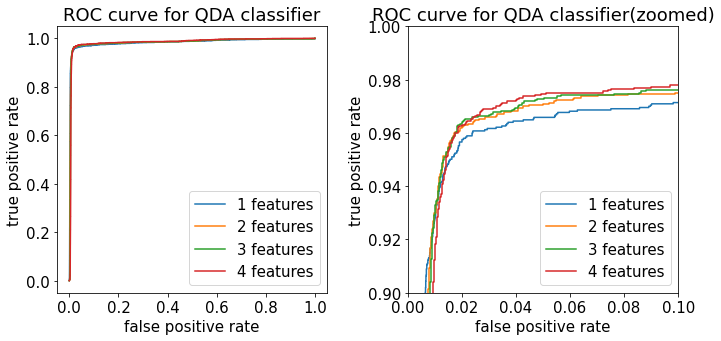

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

qda = QDA()

for i in range(4):

    qda.fit(X_train[:,0:i+1], y_train)
    y_prob = qda.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(i+1) + ' features')
    ax2.plot(fpr, tpr, label = str(i+1) + ' features')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for QDA classifier')
ax2.set_title('ROC curve for QDA classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

### 4. Logistic Regression

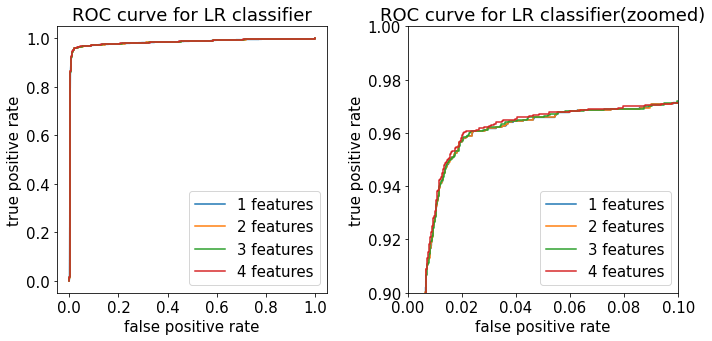

In [12]:
from sklearn.linear_model import LogisticRegression
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

lr = LogisticRegression()

for i in range(4):

    lr.fit(X_train[:,0:i+1], y_train)
    y_prob = lr.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(i+1) + ' features')
    ax2.plot(fpr, tpr, label = str(i+1) + ' features')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for LR classifier')
ax2.set_title('ROC curve for LR classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()

### 5. GMM Bayes Classifier

Here we are using a **GMM**'s (Gaussian Mixture Models) to determine the density distribution.

We choose to take into account all the four features and let the number of gaussian components varies from 2 to 18, with a step of two.

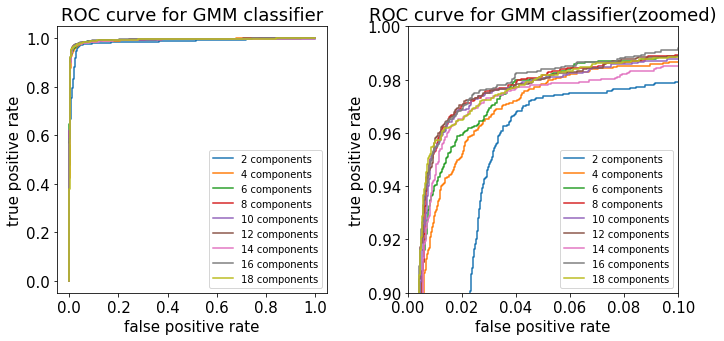

In [13]:
from astroML.classification import GMMBayes

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

for n in np.arange(2,20)[::2]:
    
    gmm = GMMBayes(n_components=n)
    gmm.fit(X_train[:,0:4], y_train)
    y_prob = gmm.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(n) + ' components')
    ax2.plot(fpr, tpr, label = str(n) + ' components')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for GMM classifier')
ax2.set_title('ROC curve for GMM classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend(fontsize = 10)
ax2.legend(fontsize = 10)
plt.show()

### 6. K-Nearest Neighbors

The K-Nearest Neighbors classifier uses the class label of the k nearest point. As before we set the number of features at 4, and vary the number k of the nearest neighbors.

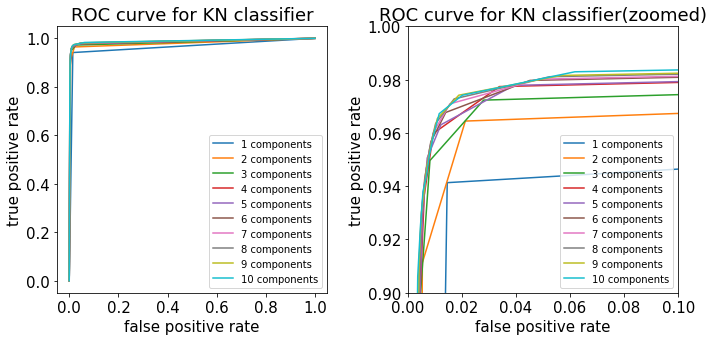

In [14]:
from sklearn.neighbors import KNeighborsClassifier

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

for n in np.arange(1,11):
    
    knc = KNeighborsClassifier(n)
    knc.fit(X_train[:,0:4], y_train)
    y_prob = knc.predict_proba(X_validation[:,0:i+1]) [:,1] 
    
    
    fpr, tpr, thresh = roc_curve(y_validation, y_prob)
    ax1.plot(fpr, tpr, label = str(n) + ' components')
    ax2.plot(fpr, tpr, label = str(n) + ' components')
    
    

ax1.set_xlabel("false positive rate")
ax1.set_ylabel("true positive rate")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")

ax1.set_title('ROC curve for KN classifier')
ax2.set_title('ROC curve for KN classifier(zoomed)')

ax2.set_xlim(0,0.1)
ax2.set_ylim(0.9,1)

fig.tight_layout()
ax1.legend(fontsize = 10)
ax2.legend(fontsize = 10)
plt.show()

## 8. Comments and final results

From the classifier we can see that usually incrementing the number of features improves the result of the classifier. This is not true for the Gaussian Naive Bayes classifier, but we need to be careful about the assumption.

Instead with the latest two classifier used, GMM Bayes and KNN, we fixed the number of attributes but we derived the best number of components for the classifier.

In the end we plot the original dataset and the classifier results to compare visually its performance.

Let's use the QDA with four attributes.

In [15]:
print(ug)
print(X[:,0])

[0.43537 1.76946 1.73268 ... 1.31842 1.27429 1.05021]
[0.43537 1.76946 1.73268 ... 1.31842 1.27429 1.05021]


(0.0, 3.0)

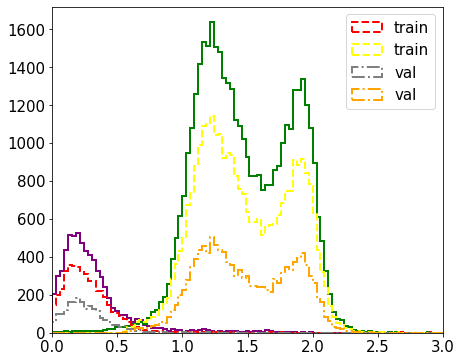

In [16]:
plt.hist(ug[labels_ == 1],histtype='step',bins=np.linspace(0,3,100), color = 'purple', linewidth = 2);
plt.hist(ug[labels_ == 0],histtype='step',bins=np.linspace(0,3,100), color = 'green', linewidth = 2);



qda = QDA()
qda.fit(X_train[:,0:4],y_train)
y_pred_train = qda.predict(X_train[:,0:4]) 
y_pred_validation = qda.predict(X_validation[:,0:4])


plt.hist(X_train[:,0][y_pred_train == 1],histtype='step',bins=np.linspace(0,3,100), color = 'red', linewidth = 2,  linestyle='--', label = 'train');
plt.hist(X_train[:,0][y_pred_train == 0],histtype='step',bins=np.linspace(0,3,100), color = 'yellow', linewidth = 2,  linestyle='--', label = 'train');

plt.hist(X_validation[:,0][y_pred_validation == 1],histtype='step',bins=np.linspace(0,3,100), color = 'grey', linewidth = 2,  linestyle='-.', label = 'val');
plt.hist(X_validation[:,0][y_pred_validation == 0],histtype='step',bins=np.linspace(0,3,100), color = 'orange', linewidth = 2,  linestyle='-.', label = 'val');


plt.legend()
plt.xlim(0,3)